# Preprocessing


In [12]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np


brecan_df = fetch_ucirepo(id=17) 
X = brecan_df.data.features 
y = brecan_df.data.targets 


expected_columns = [
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 
    'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 
    'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 
    'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]
def calculate_cancer_score(brecan_df):
    """
    Calculate cancer score based on fractal dimensions and symmetry.
    
    Args:
        brecan_df (pd.DataFrame): Input DataFrame containing breast cancer features.
        
    Returns:
        pd.DataFrame: DataFrame with added risk scores and categories.
    """
    def assign_risk_score(value):
        if value >= 0.08:
            return 3  # High risk
        elif value >= 0.07:
            return 2  # Moderate risk
        elif value >= 0.05:
            return 1  # Low risk
        return 0  
    
    scored_df = brecan_df.copy()
    
    scored_df['risk_score1'] = scored_df['fractal_dimension1'].apply(assign_risk_score)
    scored_df['risk_score2'] = scored_df['symmetry1'].apply(assign_risk_score)
    
    
    scored_df['cancer_score'] = (scored_df['risk_score1'] + scored_df['risk_score2']) / 2
    
    
    scored_df['risk_category'] = scored_df['cancer_score'].apply(
        lambda x: 'High' if x >= 2.5 else 'Moderate' if x >= 1.5 else 'Low'
    )
    
    return scored_df


columns = [col for col in expected_columns if col in X.columns]
class_labels = LabelEncoder()

brecan_df= pd.get_dummies(X[columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_encoded = pd.get_dummies(X)
X_with_score = calculate_cancer_score(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
brecan_df.head()
if __name__ == "__main__":
    
    processed_df, X_train, X_test, y_train, y_test = process_breast_cancer_data()
    
    
    print("\nFirst few rows of processed DataFrame with cancer scores:")
    print(processed_df[[
        'fractal_dimension1', 'symmetry1',  
        'risk_score1', 'risk_score2',       
        'cancer_score', 'risk_category'     
    ]].head())



First few rows of processed DataFrame with cancer scores:
   fractal_dimension1  symmetry1  risk_score1  risk_score2  cancer_score  \
0             0.07871     0.2419            2            3           2.5   
1             0.05667     0.1812            1            3           2.0   
2             0.05999     0.2069            1            3           2.0   
3             0.09744     0.2597            3            3           3.0   
4             0.05883     0.1809            1            3           2.0   

  risk_category  
0          High  
1      Moderate  
2      Moderate  
3          High  
4      Moderate  


# RANDOM FOREST


c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.97


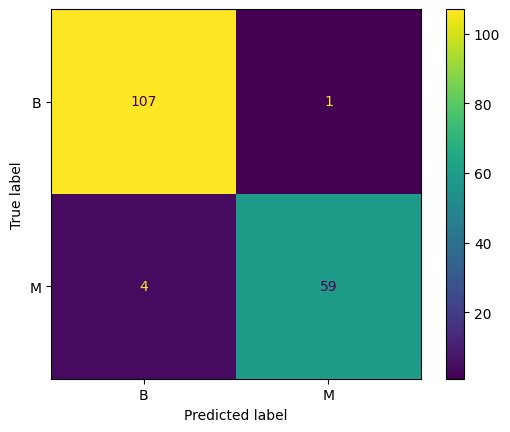

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

X_train_filtered = X_train.drop([ 'risk_category'], axis=1, errors='ignore')
X_test_filtered = X_test.drop([ 'risk_category'], axis=1, errors='ignore')

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_filtered, y_train)

accuracy = rf.score(X_test_filtered, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

y_pred = rf.predict(X_test_filtered)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()



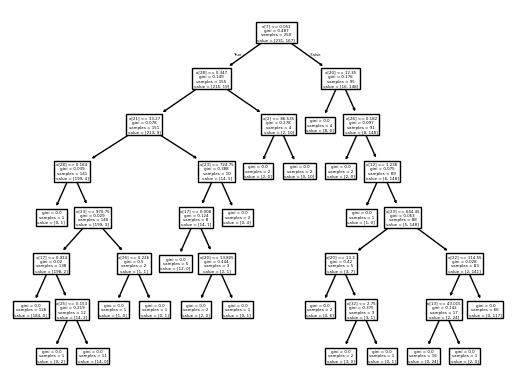

In [21]:
#recall
59/(59+4)
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
rf_tree = rf.estimators_[7]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

# SVC

SVM Model Accuracy: 0.98


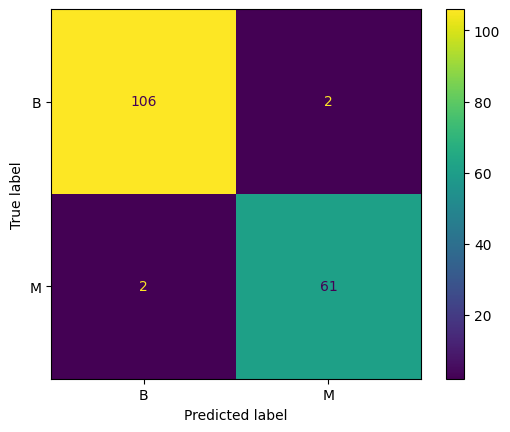

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
feature_columns = [col for col in processed_df.columns if col not in ['risk_score1', 'risk_score2', 'cancer_score', 'risk_category']]
X = processed_df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
classifier = make_pipeline(scaler, SVC(gamma='auto'))
classifier.fit(X_train, y_train.values.ravel())
y_pred_svc = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_svc)
print(f"SVM Model Accuracy: {accuracy:.2f}")

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

# PCA + Logistic Regression


Explained Variance Ratio:
[0.4316748  0.19845652 0.09733159 0.06531574 0.05212151 0.0419896
 0.02263461 0.01682669 0.0129469  0.0120941  0.01057185 0.00899278
 0.00809411]
Total variance explained: 0.98

Original Model Score: 0.9707602339181286

PCA Model Score: 0.9824561403508771


c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


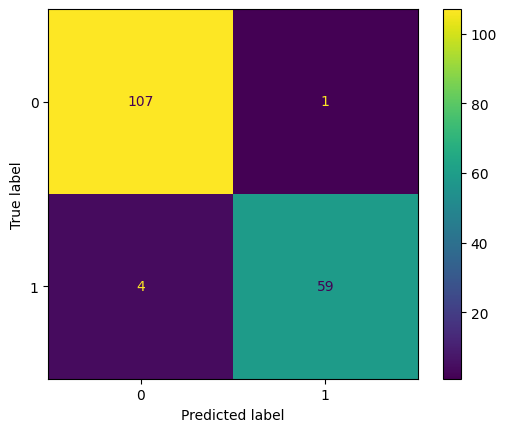

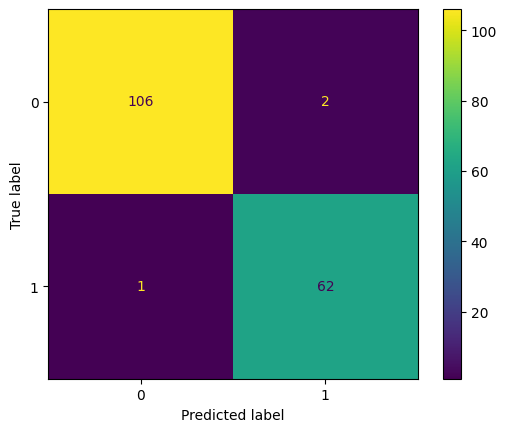

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_with_score = X_with_score.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_with_score.drop(['cancer_score', 'risk_score1', 'risk_score2', 'risk_category'], axis=1, errors='ignore'),
    y_encoded,
    test_size=0.3,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance)
print(f"Total variance explained: {sum(explained_variance):.2f}")

# Original Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train.ravel())
y_predicted = model.predict(X_test)

print("\nOriginal Model Score:", model.score(X_test, y_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

pca_model = LogisticRegression(random_state=42)
pca_model.fit(X_train_pca, y_train.ravel())

print("\nPCA Model Score:", pca_model.score(X_test_pca, y_test))
ConfusionMatrixDisplay.from_estimator(pca_model, X_test_pca, y_test)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_with_score.drop(['cancer_score', 'risk_category'], axis=1, errors='ignore'),
    y_encoded,
    test_size=0.3,
    random_state=42
)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))
print(knn.score(X_test, y_test))

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
<class 'numpy.ndarray'>
0.9590643274853801


In [26]:
agg_X = X_with_score.groupby('cancer_score').count()
agg_X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,risk_score1,risk_score2,risk_category
cancer_score,,,,,,,,,,,,,,,,,,,,,
1.5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.0,490,490,490,490,490,490,490,490,490,490,...,490,490,490,490,490,490,490,490,490,490
2.5,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
3.0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


<Axes: ylabel='risk_category'>

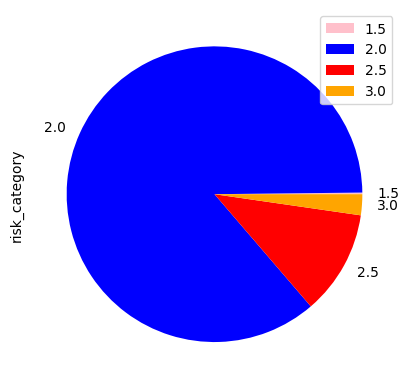

In [27]:
colors = ['pink','blue','red','orange','green','yellow']
agg_X.plot(kind="pie", y = "risk_category", colors=colors)

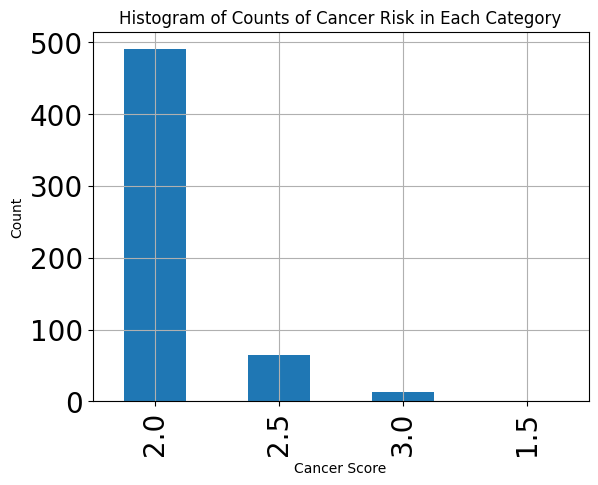

In [28]:
risk_count= X_with_score["cancer_score"].value_counts()

risk_count.plot(kind="bar")
plt.xlabel('Cancer Score')
plt.ylabel('Count')
plt.title('Histogram of Counts of Cancer Risk in Each Category')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()